In [1]:
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
def summarize(model_path):
    
    checkpt_dir = 'checkpoints/coding_noncoding/'
    checkpoint = torch.load(checkpt_dir+model_path, map_location='cpu')
    opts = checkpoint['opt']
    
    dec_type = None
    if 'decoder.conv_layers.0.conv.weight' in checkpoint['model']:
        dec_type = 'CNN'
    elif 'decoder.transformer_layers.0.self_attn.linear_values.weight' in checkpoint['model']:
        dec_type = 'Transformer'
    
    print(f'Loaded model {model_path} with parent {opts.checkpoint} , decoder type {dec_type} and mode {opts.mode}')


paths = ['Jan30_16-32-20/_step_2500.pt','Feb06_21-11-26/_step_2000.pt','Feb11_19-11-50/_step_10000.pt',\
         'Feb12_19-45-43/_step_7500.pt','Feb13_18-27-44/_step_5500.pt','Feb14_14-41-48/_step_13000.pt' ,\
         'Feb16_18-45-14/_step_7500.pt']

for p in paths:
    summarize(p)

checkpt_dir = 'checkpoints/coding_noncoding/'   
checkpoint = torch.load(checkpt_dir+'Feb16_18-45-14/_step_7500.pt', map_location='cpu')


Loaded model Jan30_16-32-20/_step_2500.pt with parent /home/bb/valejose/home/bioseq2seq/checkpoints/coding_noncoding/Jan27_19-15-44/_step_12500.pt , decoder type Transformer and mode bioseq2seq
Loaded model Feb06_21-11-26/_step_2000.pt with parent /home/bb/valejose/home/bioseq2seq/checkpoints/coding_noncoding/Jan30_16-32-20/_step_2500.pt , decoder type Transformer and mode bioseq2seq
Loaded model Feb11_19-11-50/_step_10000.pt with parent None , decoder type CNN and mode bioseq2seq
Loaded model Feb12_19-45-43/_step_7500.pt with parent None , decoder type CNN and mode ED_classify
Loaded model Feb13_18-27-44/_step_5500.pt with parent None , decoder type Transformer and mode ED_classify
Loaded model Feb14_14-41-48/_step_13000.pt with parent None , decoder type Transformer and mode bioseq2seq
Loaded model Feb16_18-45-14/_step_7500.pt with parent None , decoder type Transformer and mode ED_classify


In [7]:
def show_single_filter(gf):
    # gf: global filter: (h, h // 2 + 1, 2)
    h = gf.size(0)
    w = 64 //2 +1
    gf_complex = torch.view_as_complex(gf.contiguous())
    #gf_spatial = torch.fft.irfft2(gf_complex, dim=(0,1), s=(h,w))
    #gf_complex = torch.fft.fft2(gf_spatial, dim=(0,1))
    #gf_complex = torch.fft.fftshift(gf_complex, dim=(0,1))
    gf_abs = gf_complex.abs()
    gf_log = gf_abs.log()
    return gf_abs

n_viz_channel = 8
global_filters = []
for i_layer in range(12):
    weight = checkpoint['model'][f'encoder.fnet.{i_layer}.global_filter'].permute(2,0,1)
    global_filters.append(show_single_filter(weight)[None])
    


In [8]:
%matplotlib inline


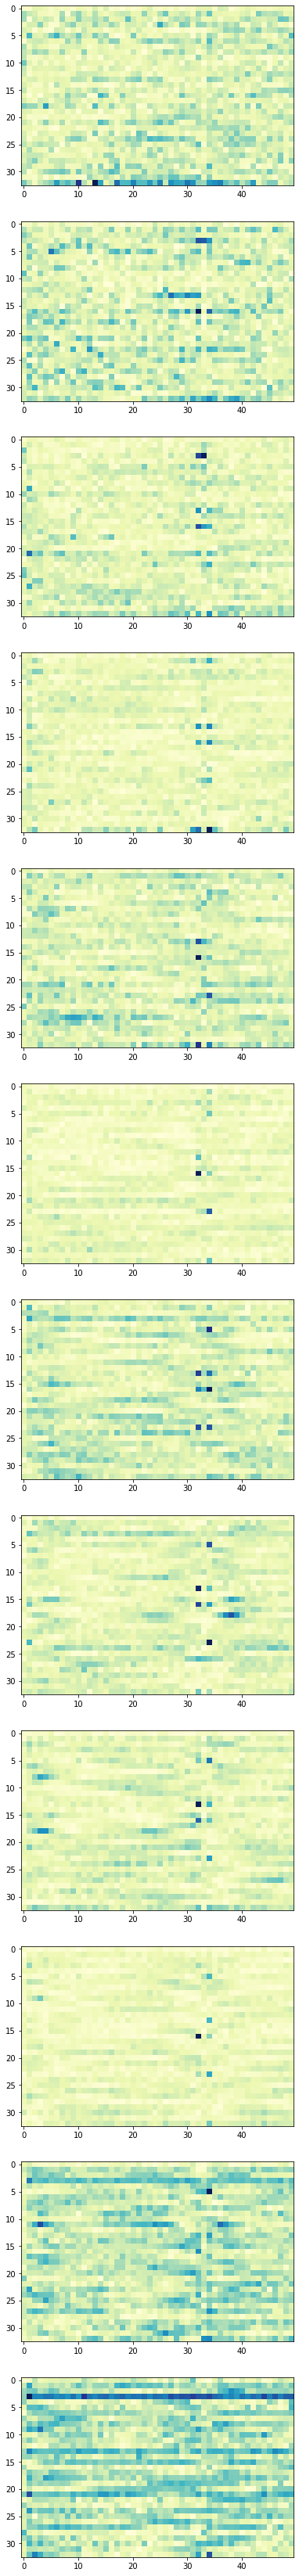

In [5]:
import numpy as np
def plot_filters(global_filter_list):
    
    fig, axs = plt.subplots(12,1,figsize=(60,60))
    for i in range(len(global_filter_list)):
        
        gf = global_filter_list[i].numpy().squeeze().T
        half_len = gf.shape[1] //2 
        gf = gf[:,:half_len]
        gf = gf / np.linalg.norm(gf)
        axs[i].imshow(gf, cmap='YlGnBu')
        idx = 200 *2 //3
        #axs[i].axvline(idx,alpha=0.1)
plot_filters(global_filters)
